<a href="https://colab.research.google.com/github/dzhuoying/Assignment-1.4---Spotify/blob/main/Team_3_Spotify_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

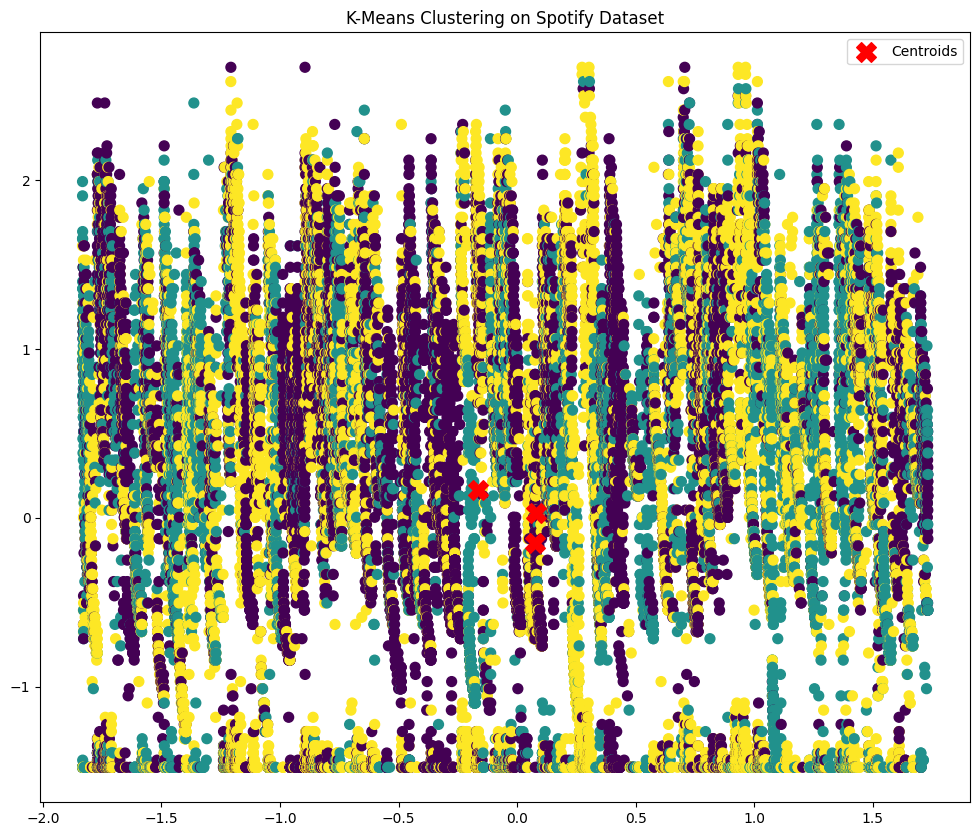

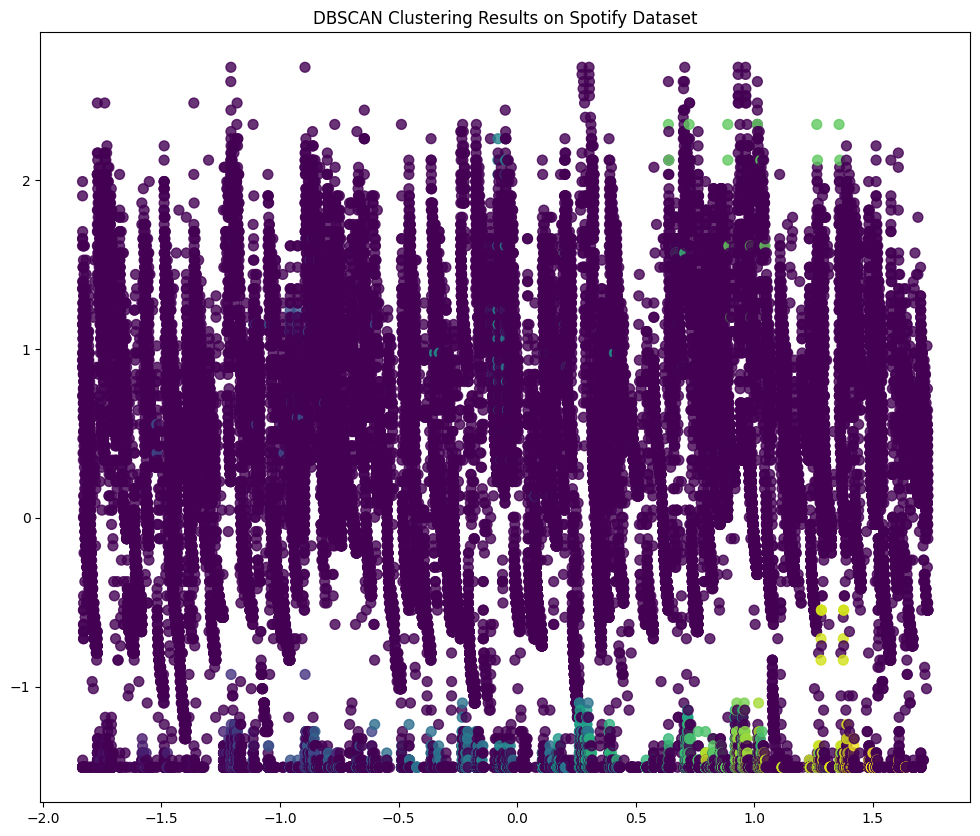

In [2]:
# Ally Dong, Hannah Moreau, Varun Sivakumar, Sahieshnu Vasanthan = Team 3
# EXPLORE:  Hannah
# ENHANCE: Ally, Sahieshnu
# USER: Varun
# GITHUB owner: Ally

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage

SPdata = pd.read_csv('spotify_tracks.csv')
numeric_cols = SPdata.select_dtypes(include=np.number).columns

for feature in numeric_cols:
    Q1 = SPdata[feature].quantile(0.25)
    Q3 = SPdata[feature].quantile(0.75)
    IQR = Q3 - Q1
    lowerQ = Q1 - 1.5 * IQR
    upperQ = Q3 + 1.5 * IQR

    SPdata = SPdata[(SPdata[feature] >= lowerQ) & (SPdata[feature] <= upperQ)]

SPdata.head()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(SPdata[numeric_cols])

kmeans = KMeans(n_clusters =3, random_state = 42)
kmeans_labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(12, 10))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering on Spotify Dataset")
plt.legend()
plt.show()

SPdata_numeric = SPdata[numeric_cols].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(SPdata_numeric)
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)
plt.figure(figsize=(12, 10))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.8)
plt.title('DBSCAN Clustering Results on Spotify Dataset')
plt.show()


